# **Regresión Lineal con PyTorch**
Aprendamos regresión lineal con ejemplos de PyTorch:

**Paso 1) Creando nuestro modelo de red**

Nuestro modelo de red es una capa lineal simple con una forma de entrada y salida de 1.

In [9]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(1, 1)

   def forward(self, x):
       x = self.layer(x)
       return x

net = Net()
print(net)

Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


**Paso 2) Datos de prueba**

Antes de iniciar el proceso de entrenamiento, es necesario conocer nuestros datos. Realizas una función aleatoria para probar nuestro modelo.

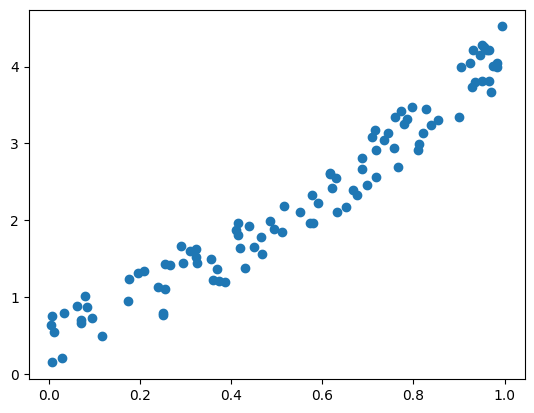

In [10]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

Antes de comenzar el proceso de entrenamiento, debe convertir la matriz numpy en variables admitidas por Torch y autograd como se muestra en el siguiente ejemplo de regresión de PyTorch.

In [11]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)

tensor([[0.2499],
        [0.0058],
        [0.8999],
        [0.7168],
        [0.7358],
        [0.9653],
        [0.5113],
        [0.5515],
        [0.0071],
        [0.3561],
        [0.3240],
        [0.7654],
        [0.0277],
        [0.6297],
        [0.7185],
        [0.1941],
        [0.8214],
        [0.2538],
        [0.7869],
        [0.7967],
        [0.7783],
        [0.9668],
        [0.1763],
        [0.3086],
        [0.6317],
        [0.9252],
        [0.6760],
        [0.3726],
        [0.5902],
        [0.3215],
        [0.8132],
        [0.0944],
        [0.9298],
        [0.3587],
        [0.8108],
        [0.6669],
        [0.9829],
        [0.6168],
        [0.5762],
        [0.6207],
        [0.2937],
        [0.8380],
        [0.0780],
        [0.8548],
        [0.6159],
        [0.6874],
        [0.4500],
        [0.2490],
        [0.9544],
        [0.6526],
        [0.8268],
        [0.7162],
        [0.4105],
        [0.9624],
        [0.3677],
        [0

**Paso 3) Optimizador y pérdida**

A continuación, debemos definir el Optimizador y la Función de Pérdida para nuestro proceso de capacitación.

In [12]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

**Paso 4) Entrenamiento**

Ahora comencemos nuestro proceso de formación. Con una epoch de 250, iterará nuestros datos para encontrar el mejor valor para nuestros hiperparámetros.

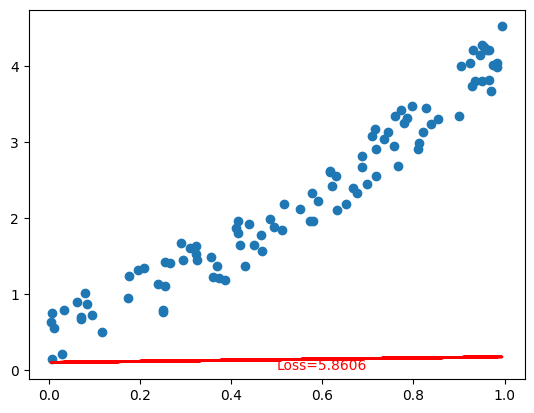

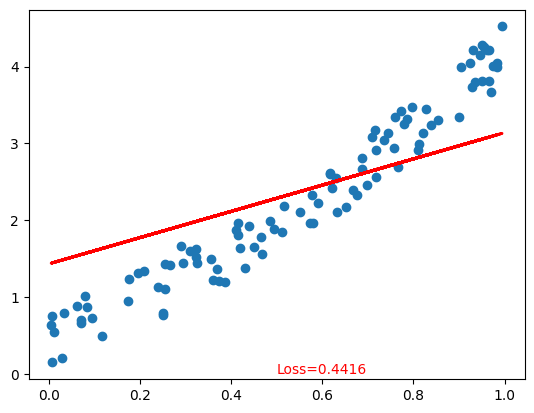

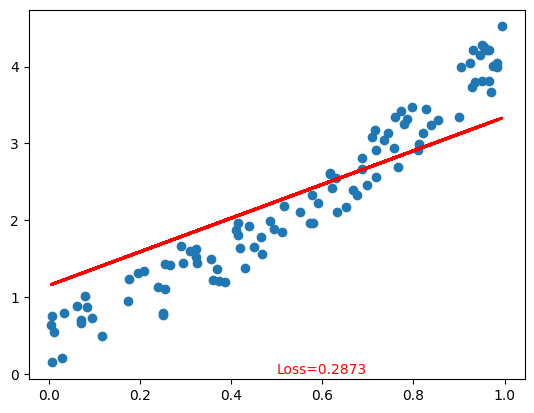

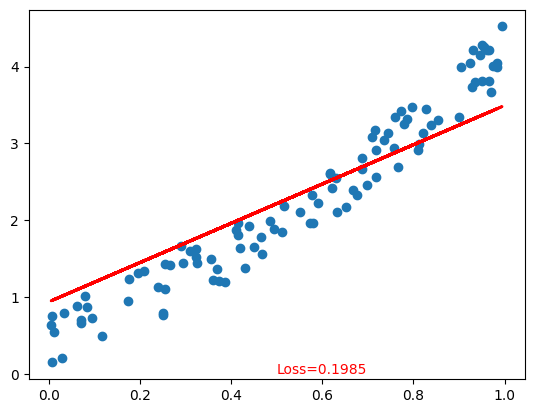

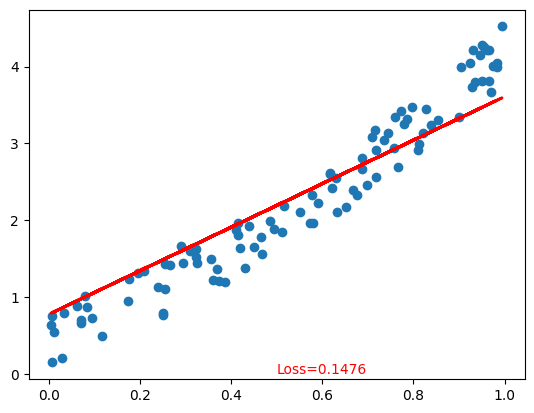

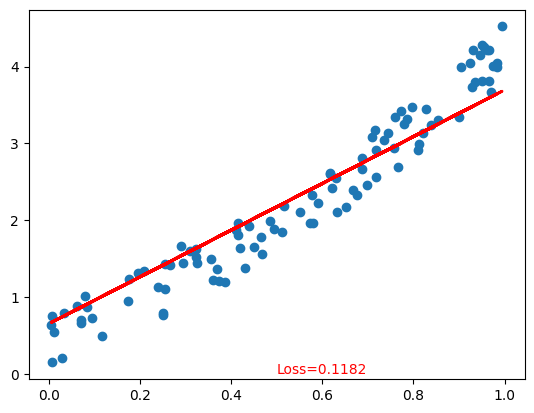

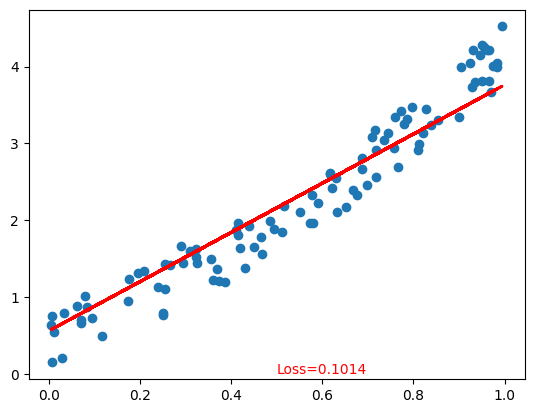

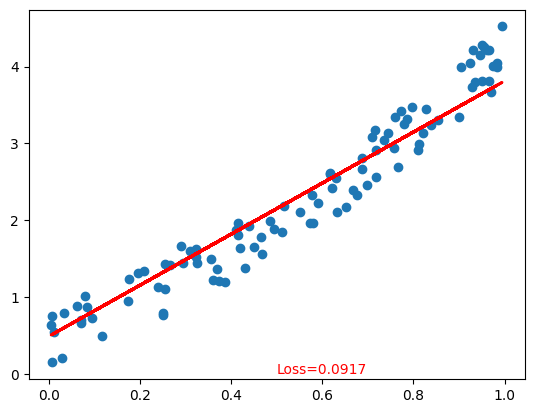

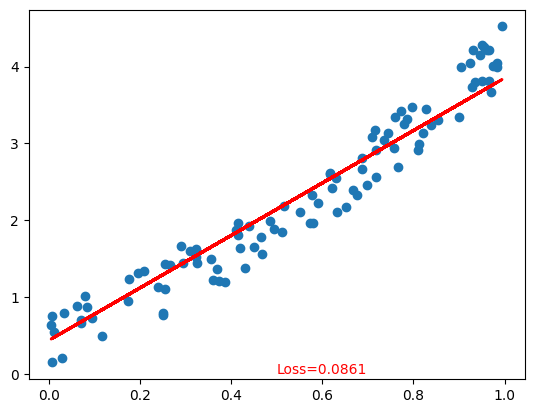

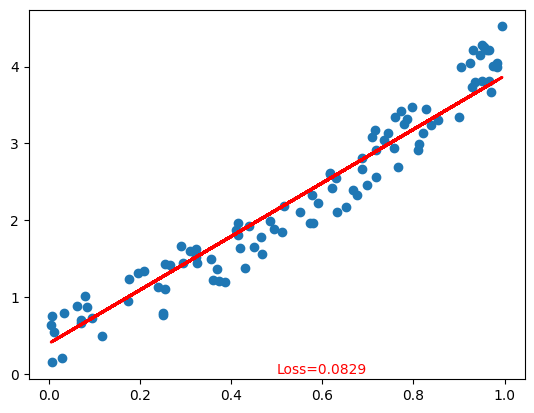

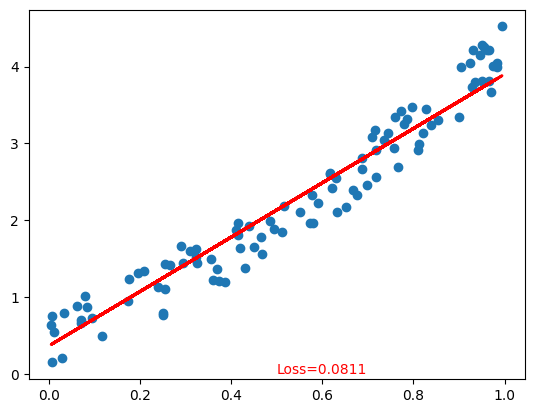

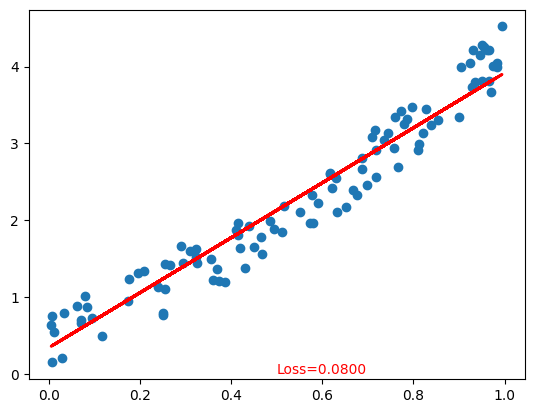

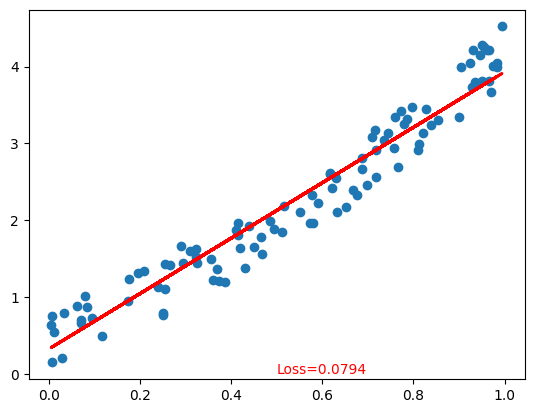

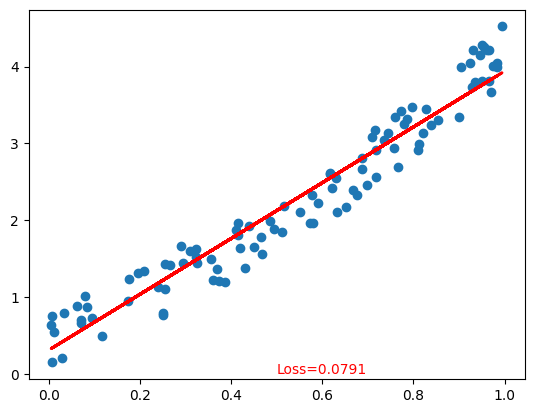

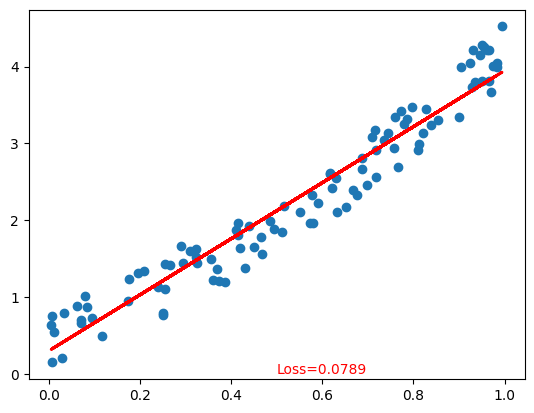

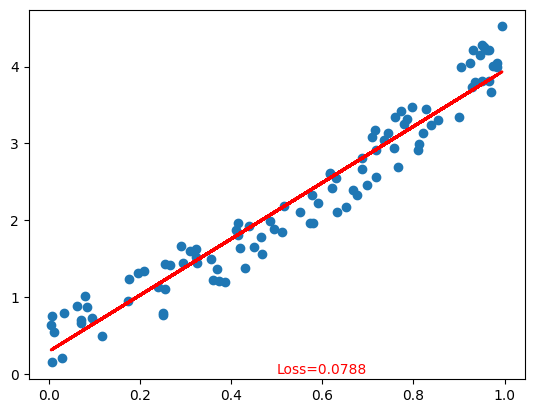

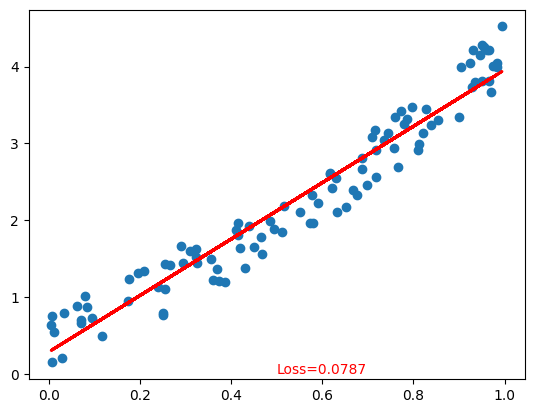

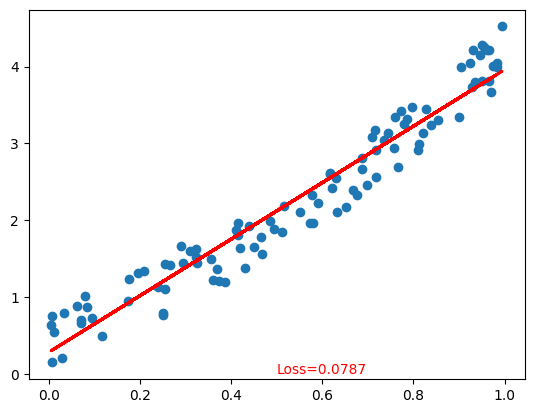

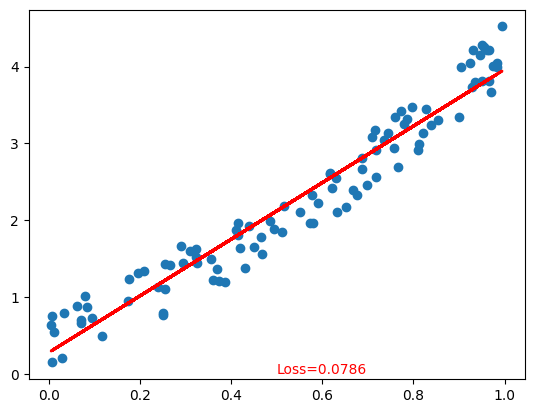

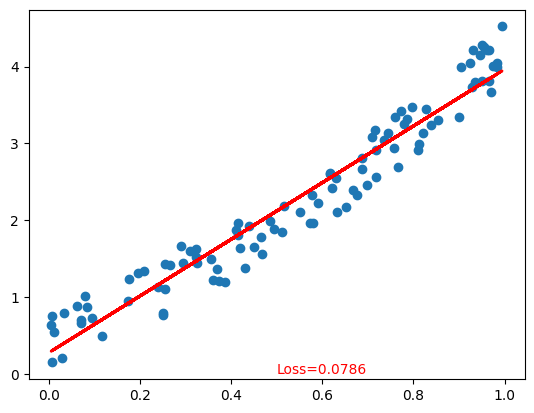

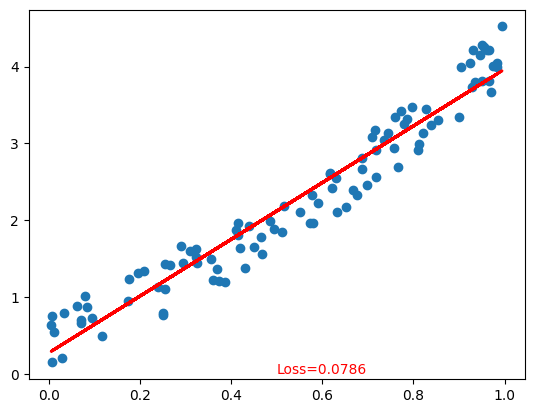

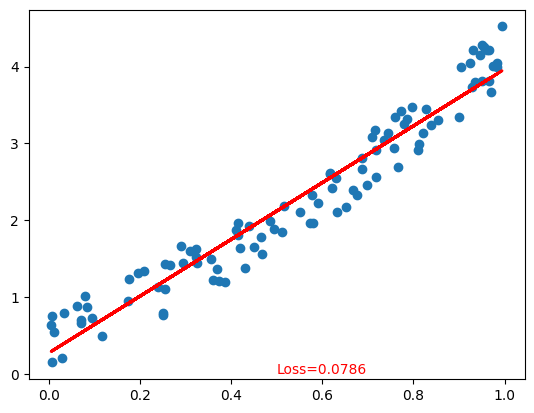

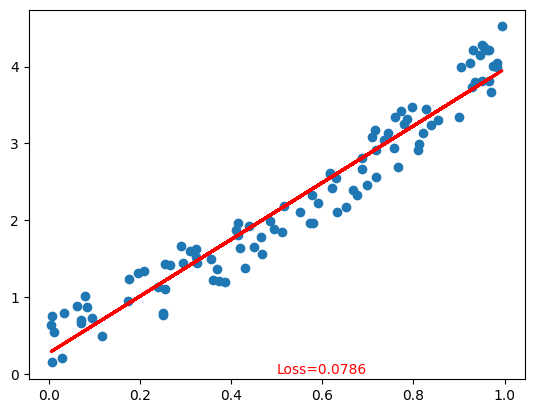

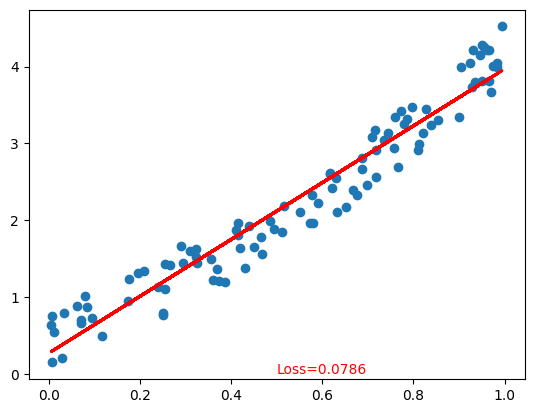

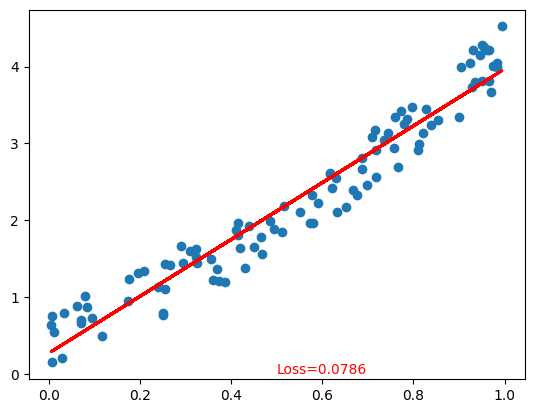

In [13]:
inputs = Variable(x)
outputs = Variable(y)
for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

   if i % 10 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()

**Paso 5) Resultado**

Como puede ver a continuación, realizó con éxito la regresión de PyTorch con una red neuronal. En realidad, en cada iteración, la línea roja en el gráfico se actualizará y cambiará su posición para ajustarse a los datos. Pero en esta imagen, solo muestra el resultado final como se muestra en el siguiente ejemplo de PyTorch:

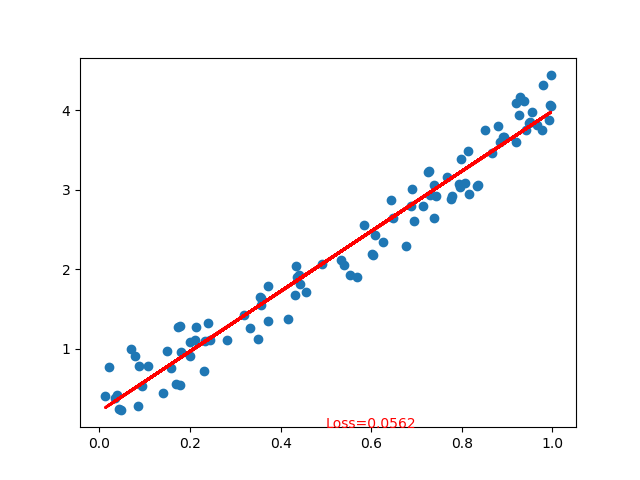